In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import names

In [2]:
rng = np.random.default_rng(seed = 1)

In [3]:
person = []
for i in range (1,100001):
    person.append ("ID {}".format(i))
#person

In [4]:
df = pd.DataFrame(index=None)
df["Person"] = person

In [5]:
age = []
for i in range(100000):
    a = np.clip(np.random.normal(50, 15), 15, 100)
    age.append(int(a))

In [6]:
df["Age"] = age

In [7]:
gender_choice = ["Male", "Female"]
gender = rng.choice (gender_choice, p = [0.79, 0.21], size = 100000)

In [8]:
df["Gender"] = gender

In [9]:
def applyFunc(s):
    if s == "Male":
        m = rng.normal(179, 10)
        return round(m, 1)
    elif s == "Female":
        f = rng.normal(164, 10)
        return round(f, 1)
    
df["Height"] = df["Gender"].apply(applyFunc)

In [10]:
def applyFunc(s):
    if s == "Male":
        m = np.clip(np.random.normal(89.2, 7 ), 30, 200)
        return round(m, 1)
    elif s == "Female":
        f = np.clip(np.random.normal(73.1, 7 ), 30, 200)
        return round(f, 1)
df["Weight"] = df["Gender"].apply(applyFunc)

In [11]:
df["BMI"] = (df["Weight"] / ((df["Height"])/100)**2).round(1)

In [12]:
def applyFunc(s):
    if s == "Male":
        m = rng.gamma(38.57,0.98)
        return round(m, 1)
    elif s == "Female":
        f = rng.gamma(15.55,0.91)
        return round(f, 1)
df["Alcohol consumption"] = df["Gender"].apply(applyFunc)

In [13]:
def applyFunc(s):
    if s <18.5:
        return "Underweight"
    elif s >=18.5 and s <25:
        return "Healthy weight"
    elif s >=25 and s <30:
        return "Overweight"
    elif s >=30 and s <40:
        return "Overweight"
    elif s >=25:
        return "Obese"
df["BMI Classification"] = df["BMI"].apply(applyFunc)

In [14]:
df

,Person,Age,Gender,Height,Weight,BMI,Alcohol consumption,BMI Classification
0,ID 1,55,Male,166.8,81.2,29.2,32.4,Overweight
1,ID 2,52,Female,170.2,64.9,22.4,16.0,Healthy weight
2,ID 3,42,Male,186.2,86.4,24.9,40.5,Healthy weight
3,ID 4,58,Female,180.8,80.6,24.7,16.4,Healthy weight
4,ID 5,40,Male,162.3,96.0,36.4,43.1,Overweight
...,...,...,...,...,...,...,...,...
99995,ID 99996,51,Male,150.2,86.3,38.3,41.1,Overweight
99996,ID 99997,48,Male,175.2,76.5,24.9,53.1,Healthy weight
99997,ID 99998,55,Male,147.2,70.4,32.5,32.9,Overweight
99998,ID 99999,47,Male,151.3,81.5,35.6,42.1,Overweight


alcohol consumption g per day

In [15]:
df.describe()

,Age,Height,Weight,BMI,Alcohol consumption
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49.521250,175.840289,85.805098,27.974081,32.803156
std,14.835465,11.713063,9.583342,4.000984,11.172768
min,15.000000,125.100000,46.100000,14.200000,4.300000
25%,39.000000,168.200000,80.000000,25.200000,28.400000
50%,49.000000,176.400000,86.900000,27.700000,35.400000
75%,60.000000,183.900000,92.600000,30.400000,40.400000
max,100.000000,220.200000,117.500000,55.400000,70.100000


In [16]:
df["BMI Classification"].value_counts()

Overweight        76537
Healthy weight    22651
Obese               575
Underweight         237
Name: BMI Classification, dtype: int64

In [17]:
df.corr()

,Age,Height,Weight,BMI,Alcohol consumption
Age,1.000000,0.005534,0.003145,-0.002927,0.003202
Height,0.005534,1.000000,0.355316,-0.655730,0.447184
Weight,0.003145,0.355316,1.000000,0.461801,0.587724
BMI,-0.002927,-0.655730,0.461801,1.000000,0.054270
Alcohol consumption,0.003202,0.447184,0.587724,0.054270,1.000000


In [50]:
fmean = [179, 89.2]
fcov = np.array([[1, 0.7], 
                [0.7, 1]]) 

data = np.random.multivariate_normal(fmean, fcov, 100)
data = pd.DataFrame(data)
data.columns = ['Height','Weight']
data

,Height,Weight
0,179.208132,89.510327
1,179.962714,89.741311
2,179.488388,88.893837
3,177.152991,88.155217
4,179.689026,89.394426
...,...,...
95,179.577940,90.388149
96,176.718697,87.369512
97,179.298681,90.248815
98,177.748154,87.267928


<AxesSubplot:xlabel='Height', ylabel='Weight'>

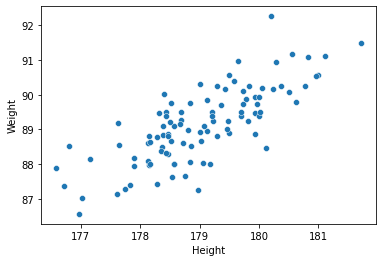

In [51]:
sns.scatterplot (x = data["Height"], y = data["Weight"])